In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db=sns.load_dataset("titanic")
db.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
db.info()
db.describe()
db.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  z_score      714 non-null    float64 
dtypes: bool(2), category(2), float64(3), int64(4), object(5)
memory usage: 87.6+ KB


(891, 16)

<Axes: xlabel='age'>

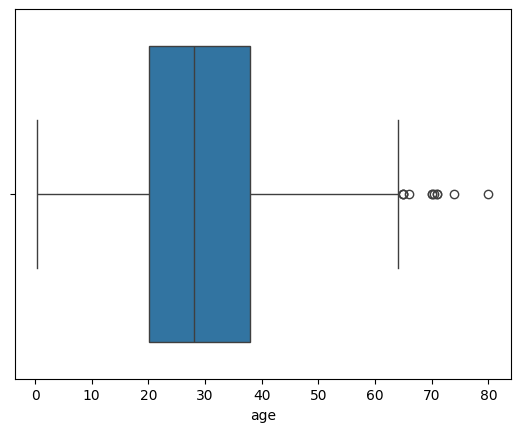

In [5]:
sns.boxplot(x='age',data=db)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14352\3517201100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(db['age'],kde=True,bins=30)


<Axes: xlabel='age', ylabel='Density'>

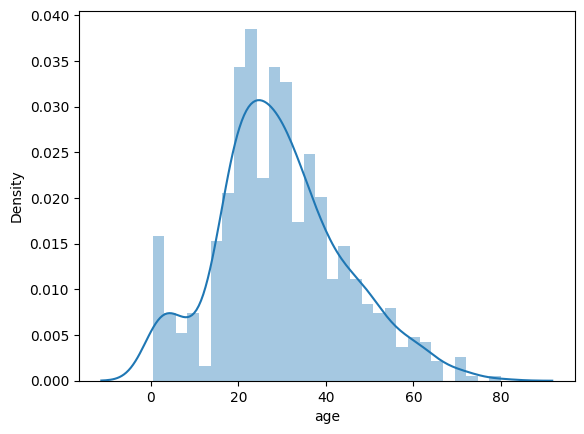

In [6]:
sns.distplot(db['age'],kde=True,bins=30)

In [7]:
min_rage=db['age'].min() - (3*db['age'].std())
max_rage=db['age'].max() + (3*db['age'].std())
print(min_rage,max_rage)

-43.15949199700212 123.57949199700212


In [8]:
new_age=db[db['age'] <= max_rage]

<Axes: xlabel='age'>

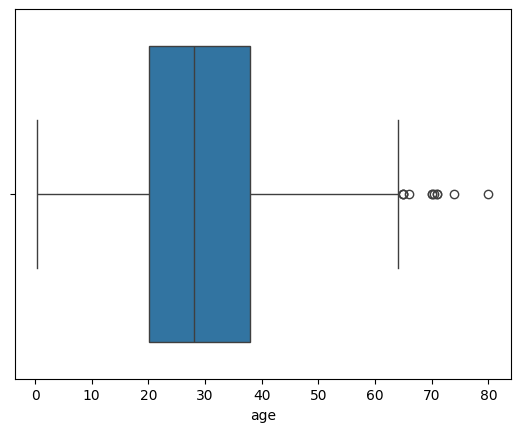

In [9]:
sns.boxplot(x='age',data=new_age)

In [10]:
z_score=(db['age'] - db['age'].mean())/db['age'].std()
print(z_score.head())

0   -0.530005
1    0.571430
2   -0.254646
3    0.364911
4    0.364911
Name: age, dtype: float64


In [11]:
z_score>3


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

In [19]:
db['z_score'] = z_score
db[db['z_score']<3]
db['z_score'].isnull().sum()


np.int64(177)